c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


1/1 [==============================] - 0s 175ms/step


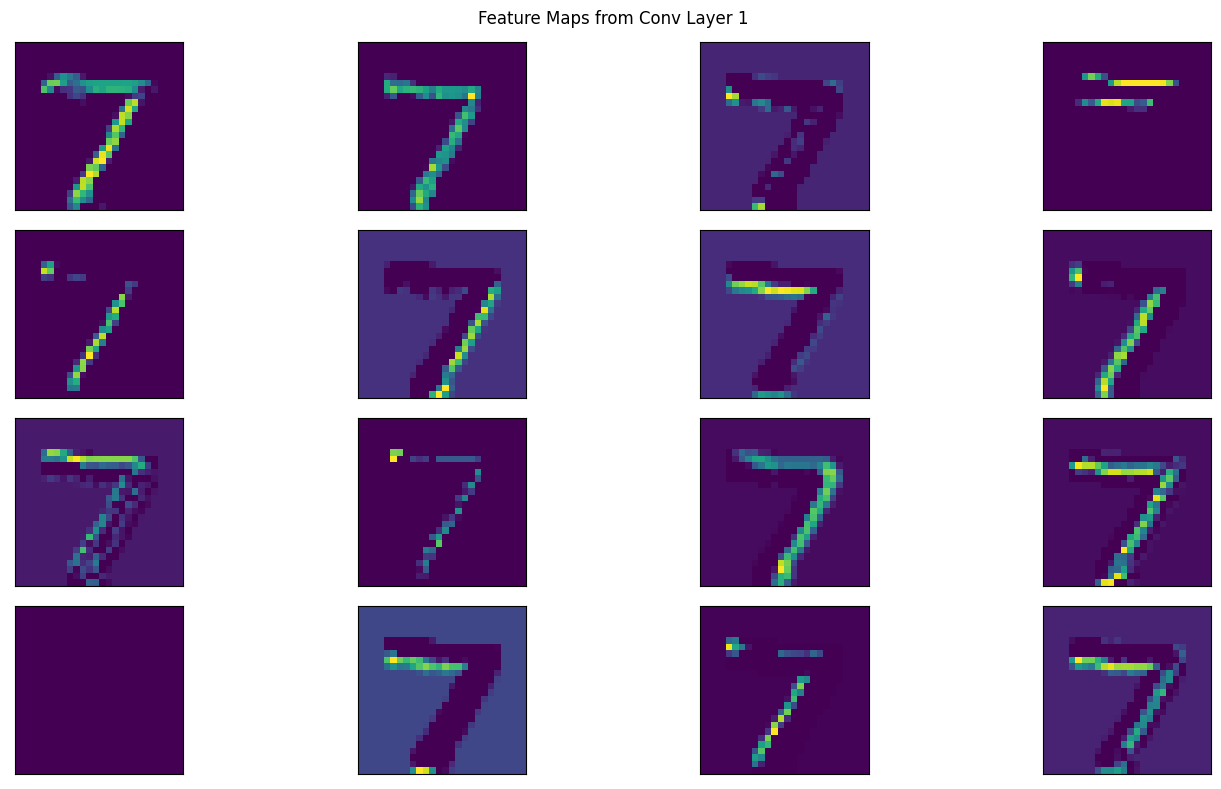

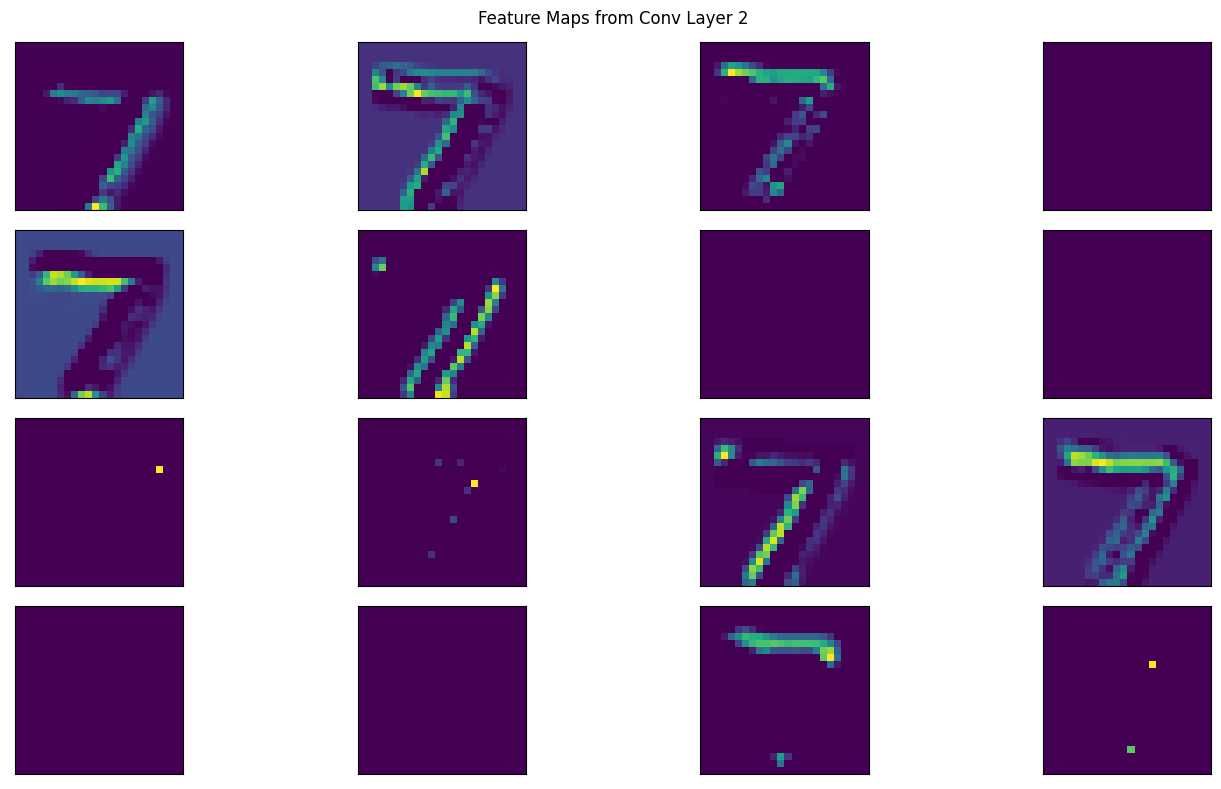

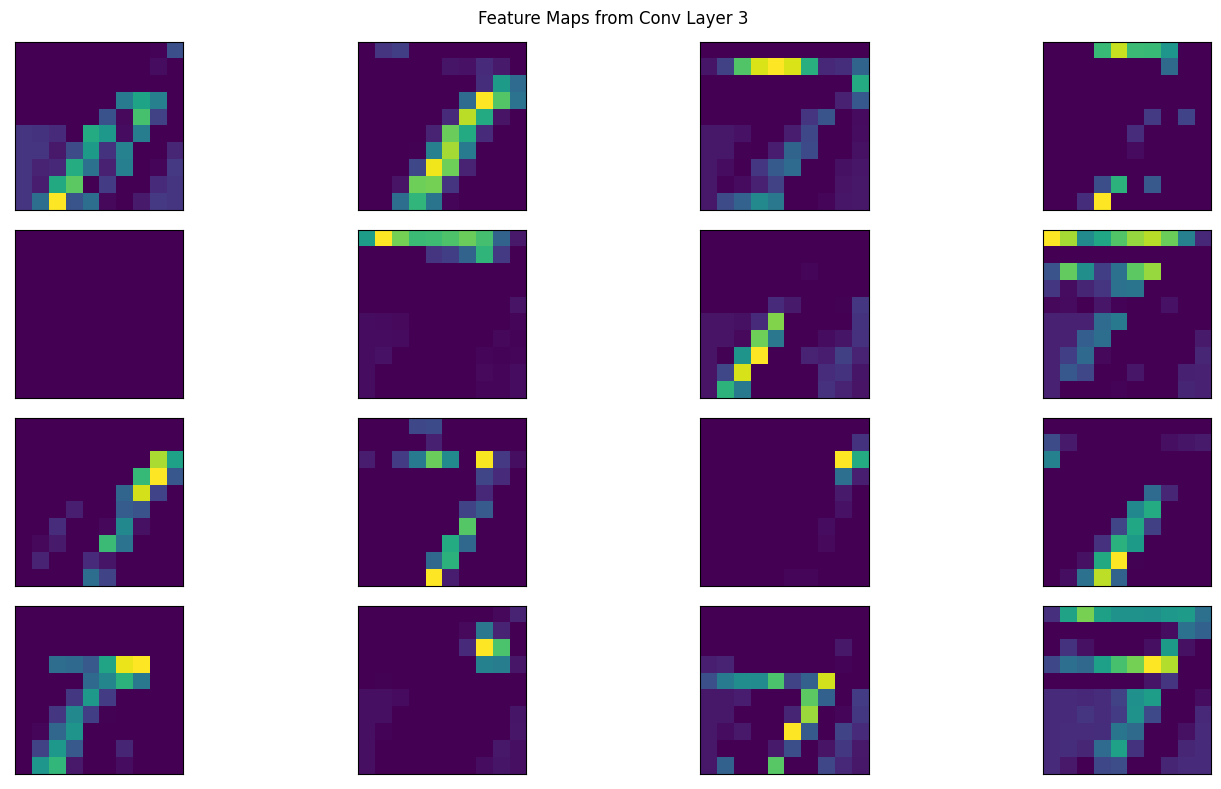

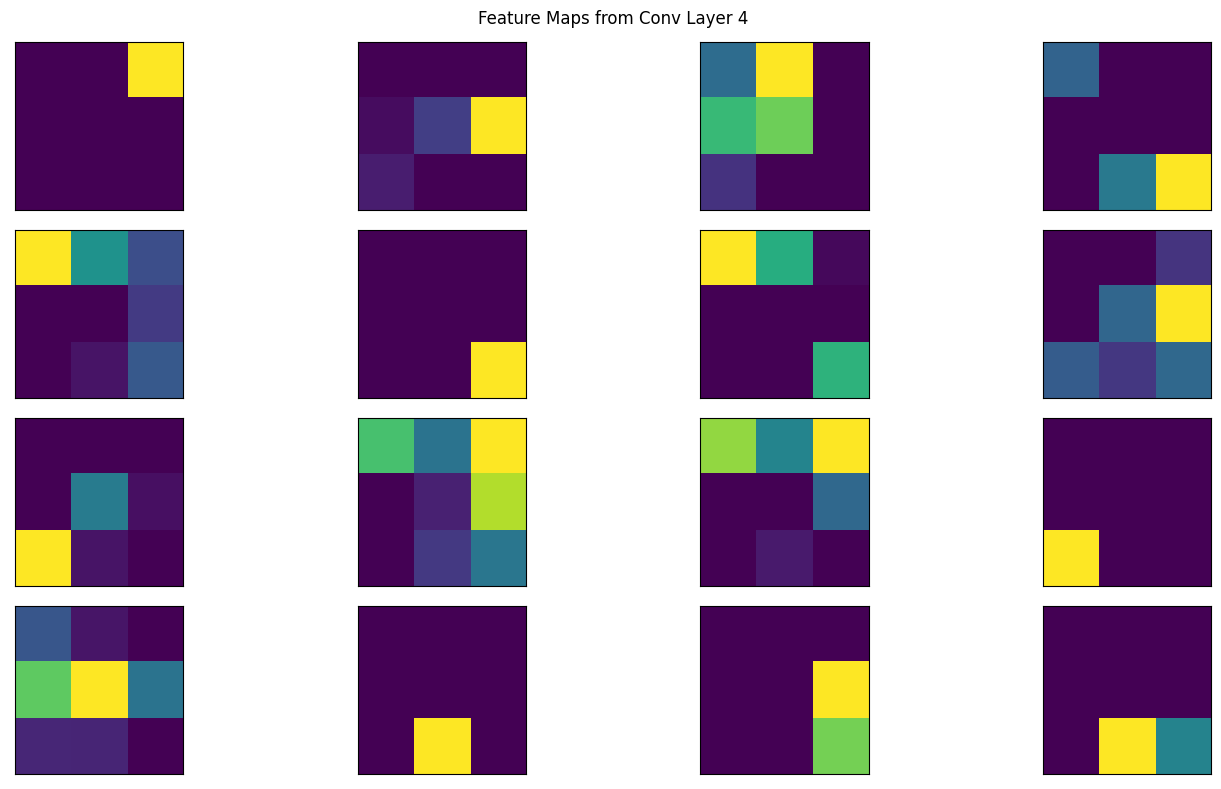

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = np.expand_dims(x_test, axis=-1).astype("float32") / 255.0

# Load the trained model
model = tf.keras.models.load_model('model/handwritten.h5')

# Select an image from the test set
image_index = 0
input_image = x_test[image_index]
input_image_batch = np.expand_dims(input_image, axis=0)

# Get the outputs from each Conv2D layer
conv_layers = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
activation_model = Model(inputs=model.input, outputs=conv_layers)

# Predict feature maps
feature_maps = activation_model.predict(input_image_batch)

# Plot feature maps for each Conv2D layer
for layer_num, fmap in enumerate(feature_maps):
    num_filters = fmap.shape[-1]
    size = fmap.shape[1]

    plt.figure(figsize=(15, 8))
    for i in range(min(16, num_filters)):  # display first 16 feature maps only
        ax = plt.subplot(4, 4, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(fmap[0, :, :, i], cmap='viridis')
    plt.suptitle(f"Feature Maps from Conv Layer {layer_num + 1}")
    plt.tight_layout()
    plt.show()